This creates the underlying scatterplot data for the output neurons

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier

In [6]:
# num data points
n = 20

def plot_decision_boundary(clf):
    # Generate a mesh grid of points to plot the decision boundary for clf
    h = 0.02
    x_min, x_max = dataset['x'].min() - 1, dataset['x'].max() + 1
    y_min, y_max = dataset['y'].min() - 1, dataset['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the dataset and the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
    plt.scatter(dataset['x'], dataset['y'], s=85, c=dataset['label'], cmap=plt.cm.RdBu, edgecolor='white')
    plt.title('Perceptron')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

In [7]:
# Create dataset that is mostly linearly separable between two classes
np.random.seed(42)
x1 = np.random.normal(loc=2, scale=3, size=(10, 2))
x2 = np.random.normal(loc=5, scale=1.5, size=(10, 2))
x3 = np.random.normal(loc=2, scale=1.5, size=(10, 2))
x4 = np.random.normal(loc=9, scale=1.5, size=(10, 2))
X = np.concatenate([x1, x2, x3, x4])
y = np.concatenate([np.zeros(20), np.ones(20)])
dataset = {'x': X[:, 0], 'y': X[:, 1], 'label': y}

## Linear Regression

In [30]:
df = pd.DataFrame(dataset)
df.to_json('scatterData.json', orient='records')

In [29]:
df

,x,y,label
0,3.490142,1.585207,0.0
1,3.943066,6.569090,0.0
2,1.297540,1.297589,0.0
3,6.737638,4.302304,0.0
4,0.591577,3.627680,0.0
5,0.609747,0.602811,0.0
6,2.725887,-3.739841,0.0
7,-3.174753,0.313137,0.0
8,-1.038493,2.942742,0.0
9,-0.724072,-2.236911,0.0


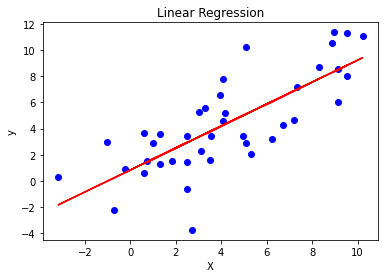

In [9]:
# Train a linear regression model on the dataset
reg = LinearRegression().fit(dataset['x'].reshape(-1,1), dataset['y'])

# Generate predictions using the trained model
y_pred = reg.predict(dataset['x'].reshape(-1,1))

# Plot the dataset and the prediction line
plt.scatter(dataset['x'], dataset['y'], color='blue')
plt.plot(dataset['x'], y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Logistic Regression

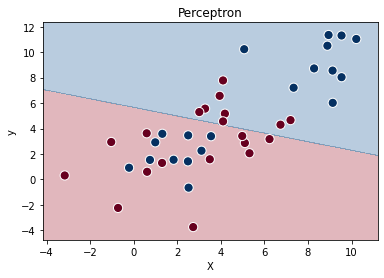

In [10]:
# Train a logistic regression model on the dataset
clf = LogisticRegression().fit(X, y)

plot_decision_boundary(clf)

In [11]:
clf.intercept_

array([-1.03096821])

In [12]:
w0 = clf.intercept_
w1, w2 = clf.coef_.squeeze()
print(w0, w1, w2)

[-1.03096821] 0.06139381579344726 0.18226813605883252


In [27]:
from sklearn.linear_model import Perceptron

import numpy as np
from sklearn.linear_model import LogisticRegression

# create a toy dataset
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 1])

# fit the logistic regression model
clf = Perceptron().fit(X, y)

# get the weights from the clf object
w0 = clf.intercept_
w1, w2 = clf.coef_.squeeze()

# predict the label for a new point [x, y]
x, y = 7, 8
z = w0 + w1*x + w2*y
p = 1 / (1 + np.exp(-z))
predicted_label = 1 if p >= 0.5 else 0

print(predicted_label) # output: 1

1


In [14]:
print(w0, w1, w2)

[-1.03096821] 0.06139381579344726 0.18226813605883252


## Perceptron

weights [[6. 0.]]
bias [-6.]


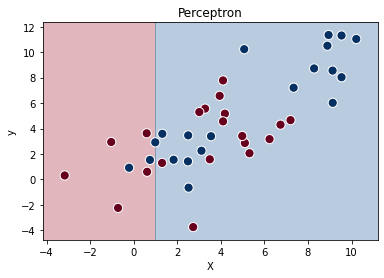

In [21]:
from sklearn.linear_model import Perceptron

# Train a perceptron model on the dataset
clf = Perceptron().fit(X, y)

weights = clf.coef_
bias = clf.intercept_
print('weights', weights)
print('bias', bias)
plot_decision_boundary(clf)

In [16]:
9.8 * -3 + 2 * 11.3 - 17

-23.8

In [17]:
import numpy as np
from sklearn.linear_model import Perceptron

# create a toy dataset
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 1])

# fit the perceptron model
clf = Perceptron().fit(X, y)

# extract the weights and bias term
weights = clf.coef_
bias = clf.intercept_

# predict the label for a new point [x, y]
new_point = np.array([[7, 8]])
z = np.dot(new_point, weights.T) + bias
print('z', z)
predicted_label = np.sign(z)

print(predicted_label) 

z [[36.]]
[[1.]]


In [18]:
6 * 7 + 0 * 8 + bias

array([36.])

## 2-layer Neural Network

/Users/wilberjw/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


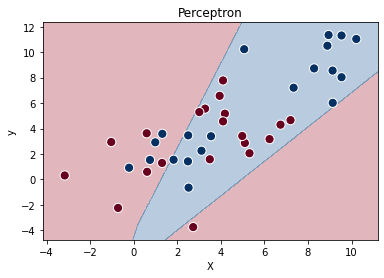

In [25]:
# Train a neural network model with two hidden layers (each a perceptron) on the dataset
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='sgd', max_iter=100).fit(X, y)

plot_decision_boundary(clf)

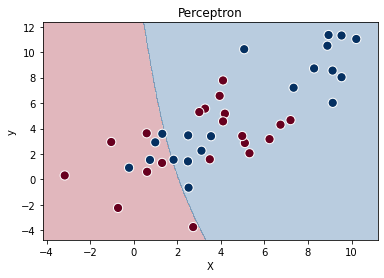

In [26]:
# Train a neural network model with two hidden layers (each a perceptron) on the dataset
clf = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', max_iter=20000).fit(X, y)

plot_decision_boundary(clf)

In [38]:
rows_with_missing_values = df.loc[list(filter(lambda x: df.loc[x].isna().any(), df.index))]
rows_with_missing_values

,x,y,label


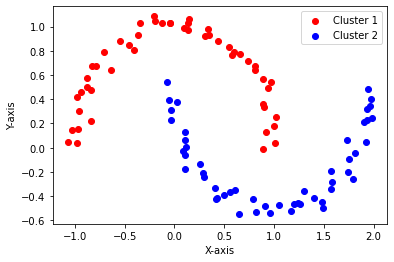

In [39]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

n_samples = 100
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# The dataset is a tuple, with the first element containing the (x, y) coordinates and the second element containing the labels
X, y = noisy_moons

# Create a scatter plot using different colors for the two moon-shaped clusters
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Cluster 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Cluster 2')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best')

# Show the plot
plt.show()


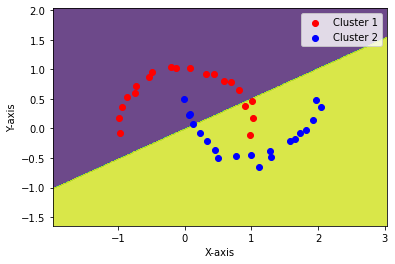

In [64]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

n_samples = 40
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# The dataset is a tuple, with the first element containing the (x, y) coordinates and the second element containing the labels
X, y = noisy_moons

# Train the logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the label for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using a contour plot
plt.contourf(xx, yy, Z, alpha=0.8)

# Create a scatter plot using different colors for the two moon-shaped clusters
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Cluster 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Cluster 2')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best')

# Show the plot
plt.show()


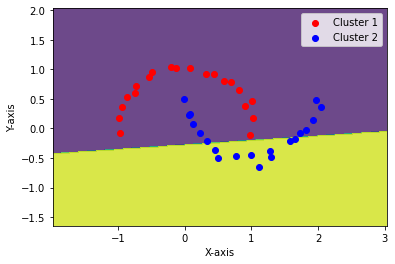

In [67]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

for i in range(1):
    np.random.seed(i)
    # Train the Perceptron model
    model = Perceptron()
    model.fit(X, y)

    # Predict the label for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary using a contour plot
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Create a scatter plot using different colors for the two moon-shaped clusters
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Cluster 1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Cluster 2')

    # Add labels and a legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best')

    # Show the plot
    plt.show()


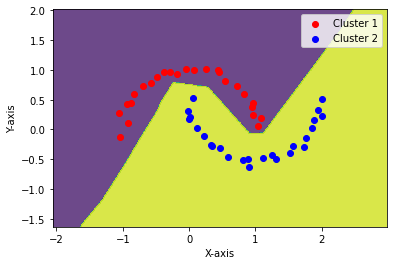

In [118]:
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

n_samples = 50
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# The dataset is a tuple, with the first element containing the (x, y) coordinates and the second element containing the labels
X, y = noisy_moons

# Train the neural network with two hidden layers
model = MLPClassifier(hidden_layer_sizes=(6, 8), activation='relu', max_iter=20000)
model.fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the label for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary using a contour plot
plt.contourf(xx, yy, Z, alpha=0.8)

# Create a scatter plot using different colors for the two moon-shaped clusters
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Cluster 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Cluster 2')

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best')

# Show the plot
plt.show()


In [116]:
# n_samples = 30
# noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# X, y = noisy_moons

# # Combine the features and the labels into a single array
# data = np.column_stack((X, y))

# # Create a pandas DataFrame with column names x1, x2, and y
# df = pd.DataFrame(data, columns=['x1', 'x2', 'y'])
# df.to_json('moon.json', orient='records')
# print(df.head())

         x1        x2    y
0 -0.198642  0.918405  0.0
1 -0.395239  0.922744  0.0
2  1.736686 -0.091616  1.0
3  0.923472  0.246100  0.0
4  0.719175 -0.533591  1.0


In [121]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# Assuming X and y are already defined
# model = MLPClassifier(hidden_layer_sizes=(6, 8), activation='relu', max_iter=20000)
# model.fit(X, y)

def relu(x):
    return np.maximum(0, x)

def predict_custom(x, weights, biases):
    layer_output = x
    num_layers = len(weights)
    
    # Apply weights and biases for each layer
    for i in range(num_layers):
        layer_output = np.dot(layer_output, weights[i]) + biases[i]
        
        # Apply ReLU activation function for all layers except the last one
        if i < num_layers - 1:
            layer_output = relu(layer_output)
    
    # Return the class with the highest output value
    return np.argmax(layer_output, axis=1)

# Extract weights and biases
weights = model.coefs_
biases = model.intercepts_

# Test the custom prediction function on a new data point
new_point = np.array([[0, 2]])
prediction = predict_custom(new_point, weights, biases)
print("Prediction:", prediction)


Prediction: [0]


In [130]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# Assuming X and y are already defined
model = MLPClassifier(hidden_layer_sizes=(6, 8), activation='relu', max_iter=20000)
model.fit(X, y)

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_custom(x, weights, biases):
    layer_output = x
    num_layers = len(weights)
    
    # Apply weights and biases for each layer
    for i in range(num_layers):
        layer_output = np.dot(layer_output, weights[i]) + biases[i]
        
        # Apply ReLU activation function for all layers except the last one
        if i < num_layers - 1:
            layer_output = relu(layer_output)

    # Apply the sigmoid activation function for the output layer
    layer_output = sigmoid(layer_output)

    # Return the class with the highest output value
    return np.argmax(layer_output, axis=1)

# Extract weights and biases
weights = model.coefs_
biases = model.intercepts_

# Test the custom prediction function on a new data point
new_point = np.array([[5, 7]])
prediction_custom = predict_custom(new_point, weights, biases)
print("Custom Prediction:", prediction_custom)

# Compare with the built-in predict method
prediction_builtin = model.predict(new_point)
print("Built-in Prediction:", prediction_builtin)

# Check if the predictions are the same
print("Predictions match:", np.array_equal(prediction_custom, prediction_builtin))


Custom Prediction: [0]
Built-in Prediction: [0]
Predictions match: True
